Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

K-means clustering with 3 clusters of sizes 50, 52, 48

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     4.269231    1.342308
3     5.595833    2.037500

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.02200 13.05769 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48         4
  3      0          2        46

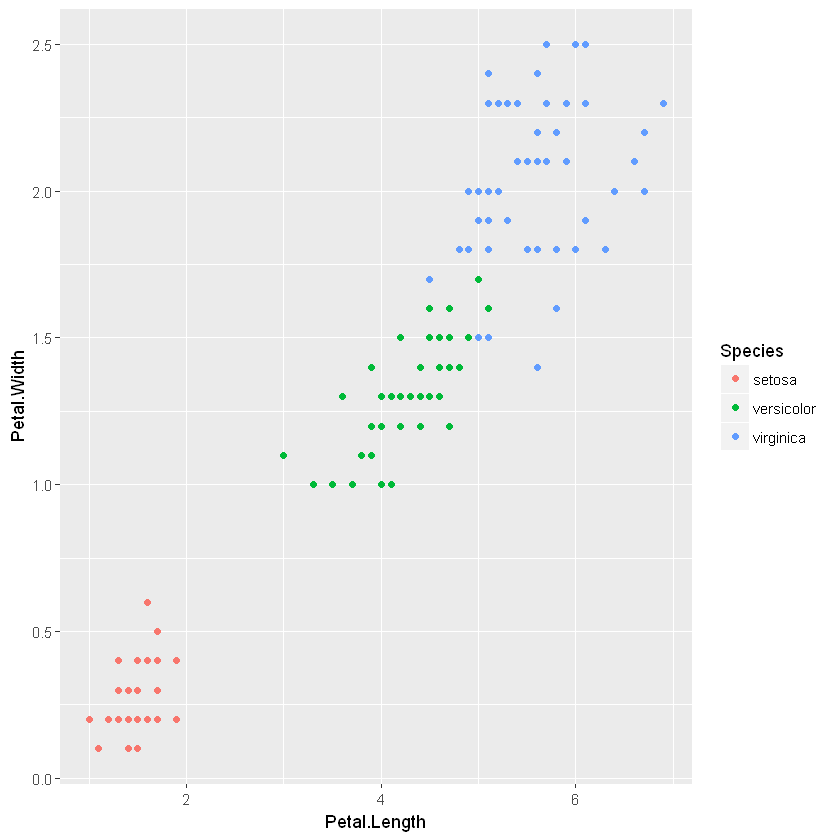

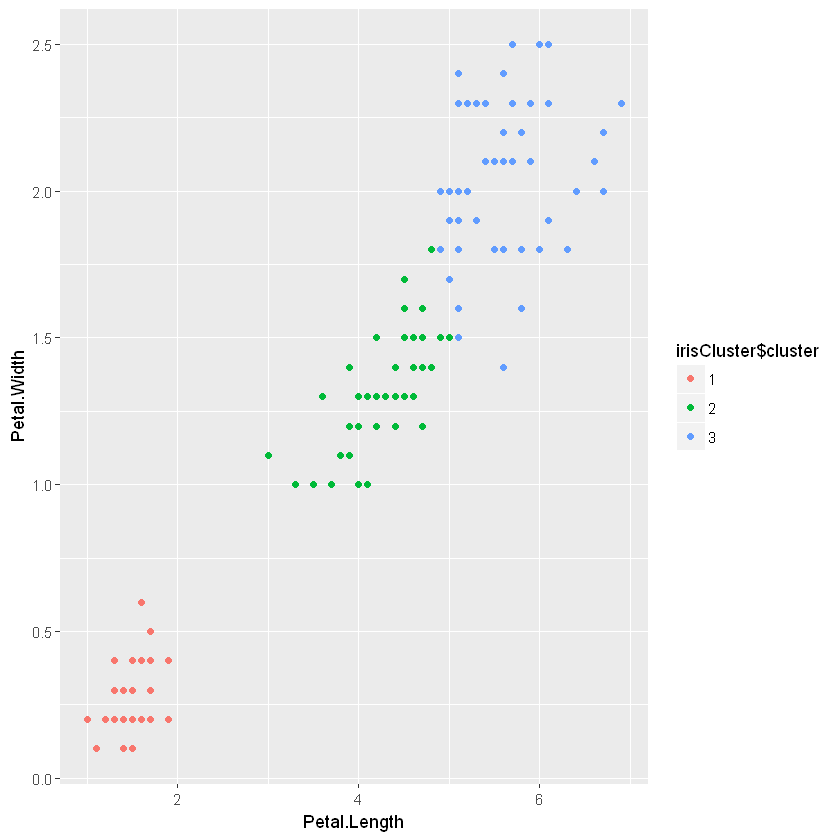

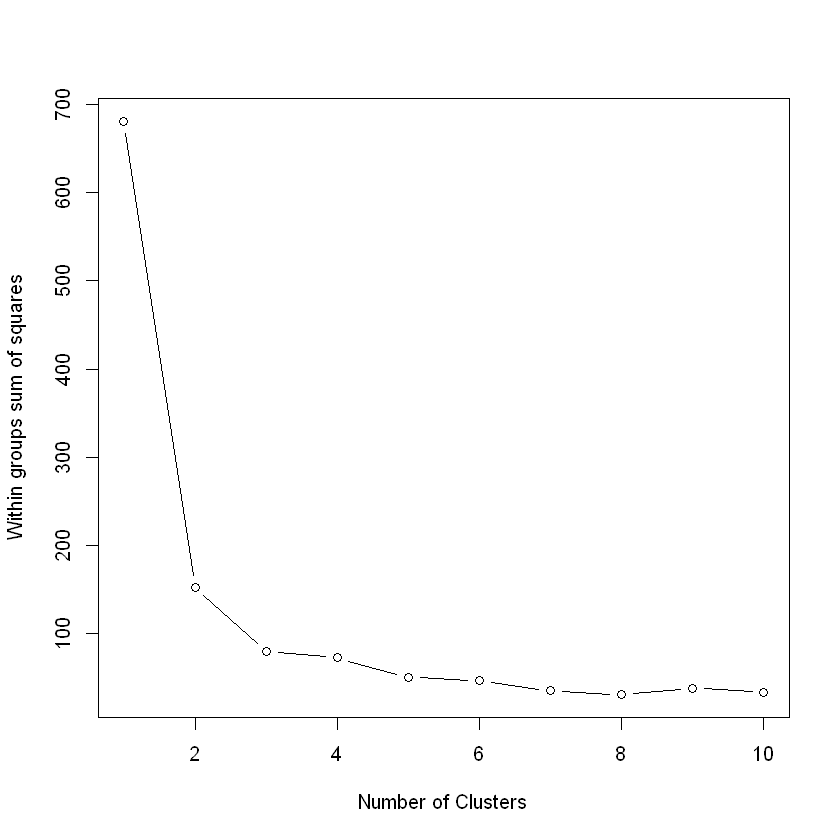

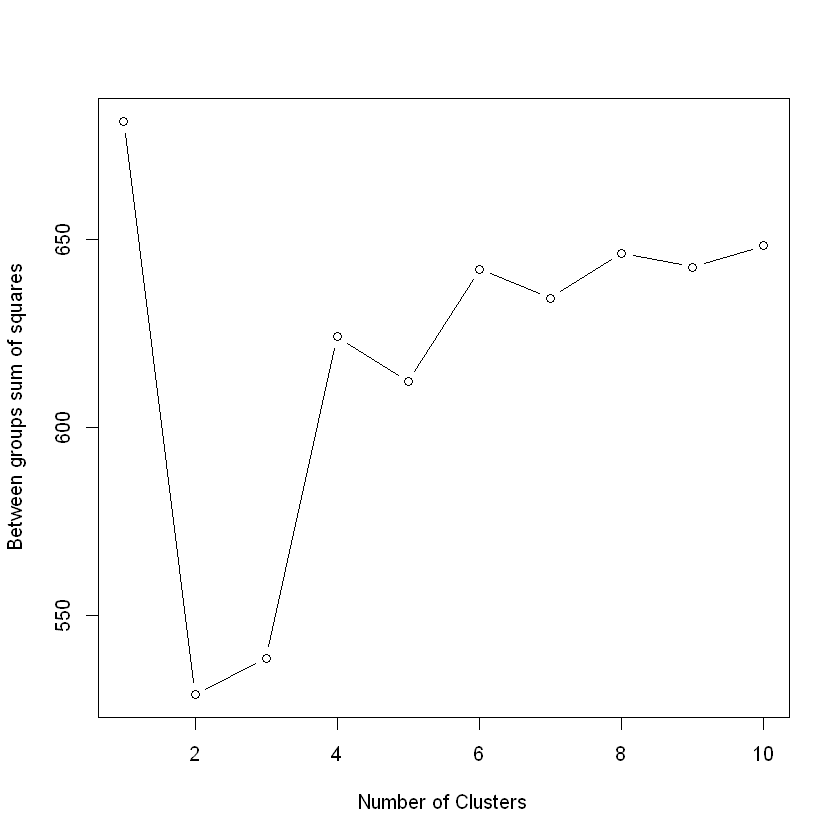

In [1]:

library(datasets)
head(iris)

library(ggplot2)

ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()

set.seed(20)
irisCluster <- kmeans(iris[, 3:4], 3, nstart = 20)
irisCluster

table(irisCluster$cluster, iris$Species)

irisCluster$cluster <- as.factor(irisCluster$cluster)
ggplot(iris, aes(Petal.Length, Petal.Width, color = irisCluster$cluster)) + geom_point()

# Determine number of clusters
mydata <- iris
mydata$Species <- NULL

wss <- (nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 2:10) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
for (i in 2:10) wss[i] <- sum(kmeans(mydata, centers=i)$betweenss)
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="Between groups sum of squares")